# Support Vector Maschinen

In der heutigen Übung betrachten wir Support Vektor Maschinen.
Dazu werden wir zuerst anhand des Iris-Datensatzes eine Klassifikation durchführen



Erstellen Sie unterschiedliche SVM mit unterschiedlichen Kernels und berechnen Sie die Erkennungsraten auf dem Iris-Datenset nachdem sie 
die Daten in Train/Test gesplittet haben


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [12]:
iris = datasets.load_iris()

X = iris.data[:, [1,3]]
y = iris.target


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [13]:
C = 1
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X_train, y_train) for clf in models)

print("training done")

training done


In [14]:
for model in models:
    score=model.score(X_test,y_test)
    print(score)

0.9666666666666667
0.9
0.9666666666666667
0.9666666666666667


In [15]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy

In [16]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

(150, 2)


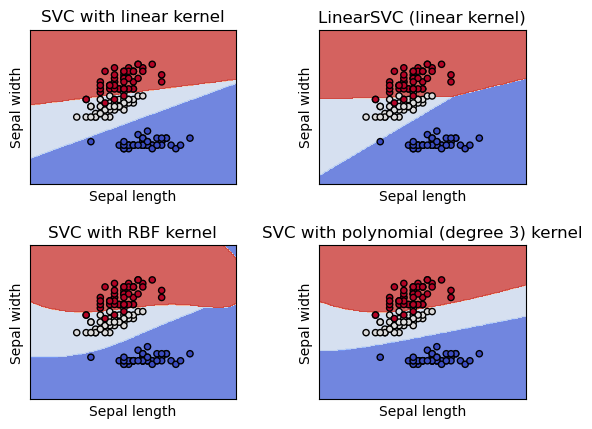

In [28]:
iris = datasets.load_iris()

X = iris.data[:, [1,3]]
y = iris.target

print(X.shape)

models = (svm.SVC(kernel='linear', C=C ),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

titles = ('SVC with linear kernel','LinearSVC (linear kernel)','SVC with RBF kernel','SVC with polynomial (degree 3) kernel')

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()